In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset


In [2]:
data = pd.read_csv('Final Transactions.csv')

# Display the first few rows

In [3]:
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


# Summary of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [5]:
data.shape

(1754155, 10)

# Check for any missing values

In [6]:
data.isnull().sum()

,0
Unnamed: 0,0
TRANSACTION_ID,0
TX_DATETIME,0
CUSTOMER_ID,0
TERMINAL_ID,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0


In [7]:
data.duplicated().sum()

0

In [8]:
print("No of transactions Flagged as Valid:",data.TX_FRAUD_SCENARIO.value_counts()[0])
print("No of transactions Flagged as Fraud:",data.TX_FRAUD_SCENARIO.value_counts()[1])

No of transactions Flagged as Valid: 1518186
No of transactions Flagged as Fraud: 222261


In [9]:
print("No of Valid transactions:",data.TX_FRAUD_SCENARIO.value_counts()[0],'which is ',round(data.TX_FRAUD_SCENARIO.value_counts()[0]/data.shape[0] * 100,2),'%')
print("No of Fraud transactions:",data.TX_FRAUD_SCENARIO.value_counts()[1],'which is ',round(data.TX_FRAUD_SCENARIO.value_counts()[1]/data.shape[0] * 100,2),'%')

data.TX_FRAUD_SCENARIO.value_counts()

No of Valid transactions: 1518186 which is  86.55 %
No of Fraud transactions: 222261 which is  12.67 %


,count
TX_FRAUD_SCENARIO,
0,1518186
1,222261
2,9077
3,4631


In [10]:
# Descriptive statistics
data.describe()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01
std,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


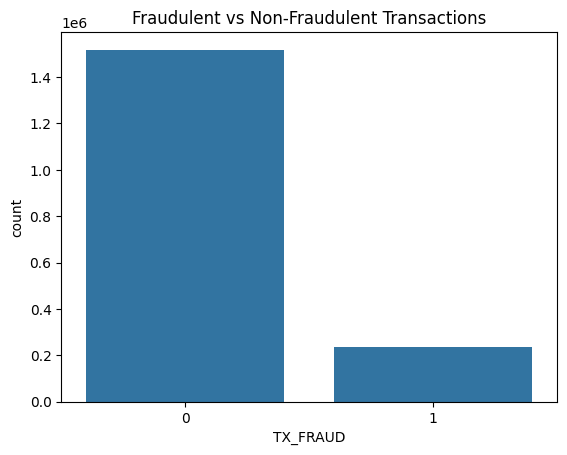

In [11]:
# Fraudulent vs Non-Fraudulent Transactions Count
sns.countplot(x='TX_FRAUD', data=data)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()


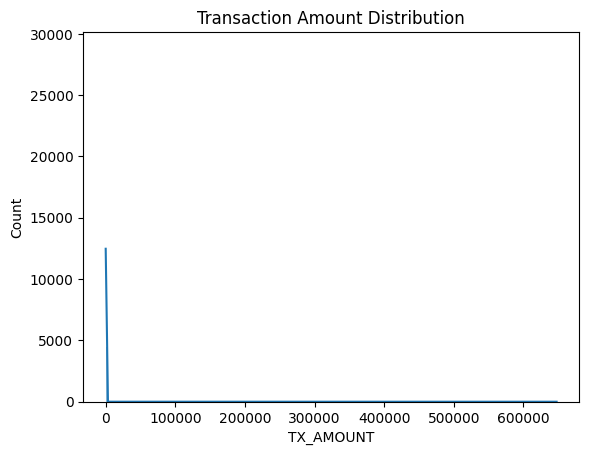

In [12]:
#  Distribution of Transaction Amounts
sns.histplot(data['TX_AMOUNT'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

In [1]:
# Convert TX_DATETIME to datetime format
data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'])

# Extract relevant time features
data['TX_HOUR'] = data['TX_DATETIME'].dt.hour
data['TX_DAY'] = data['TX_DATETIME'].dt.dayofweek
data['TX_MONTH'] = data['TX_DATETIME'].dt.month

# Drop original TX_DATETIME as we extracted required components
data = data.drop(columns=['TX_DATETIME', 'TRANSACTION_ID'])


NameError: name 'pd' is not defined

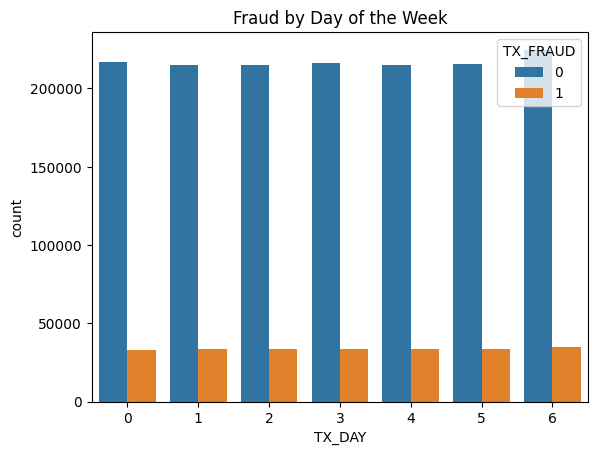

In [14]:
# Fraud by Day of Week
sns.countplot(x='TX_DAY', hue='TX_FRAUD', data=data)
plt.title('Fraud by Day of the Week')
plt.show()

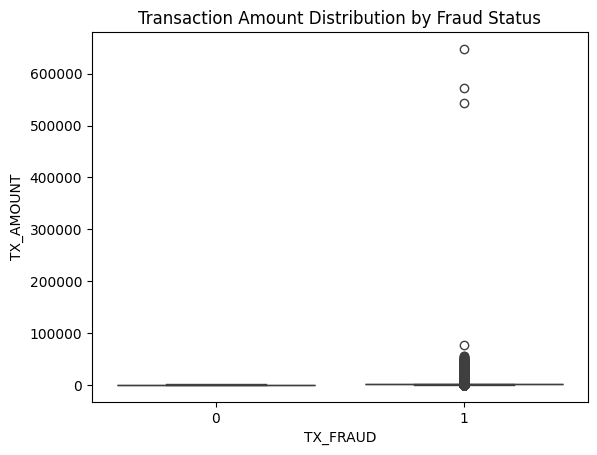

In [15]:
# Transaction Amounts for Fraudulent and Legitimate Transactions
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=data)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()


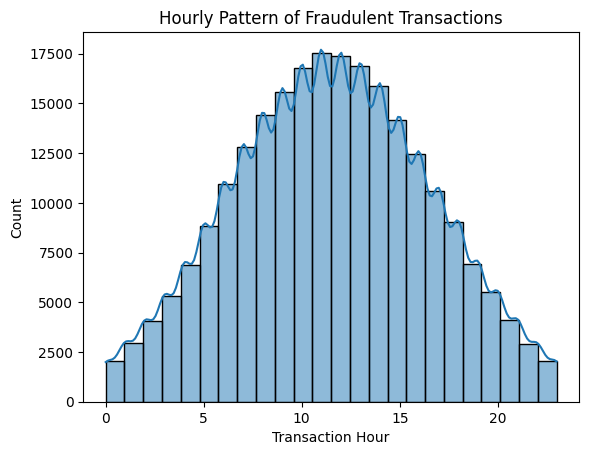

In [16]:
# Hourly Pattern of Fraudulent Transactions
sns.histplot(data[data['TX_FRAUD'] == 1]['TX_HOUR'], bins=24, kde=True)
plt.title('Hourly Pattern of Fraudulent Transactions')
plt.xlabel('Transaction Hour')
plt.show()

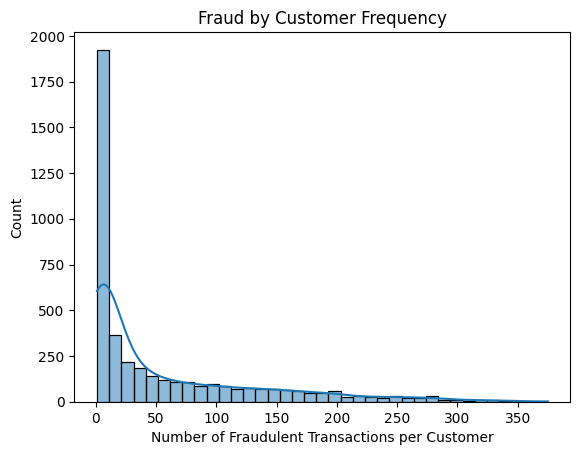

In [17]:
# Fraud by Customer Frequency
fraud_by_customer = data[data['TX_FRAUD'] == 1]['CUSTOMER_ID'].value_counts()
sns.histplot(fraud_by_customer, kde=True)
plt.title('Fraud by Customer Frequency')
plt.xlabel('Number of Fraudulent Transactions per Customer')
plt.show()

# Customer Frequency of Fraudulent Transactions

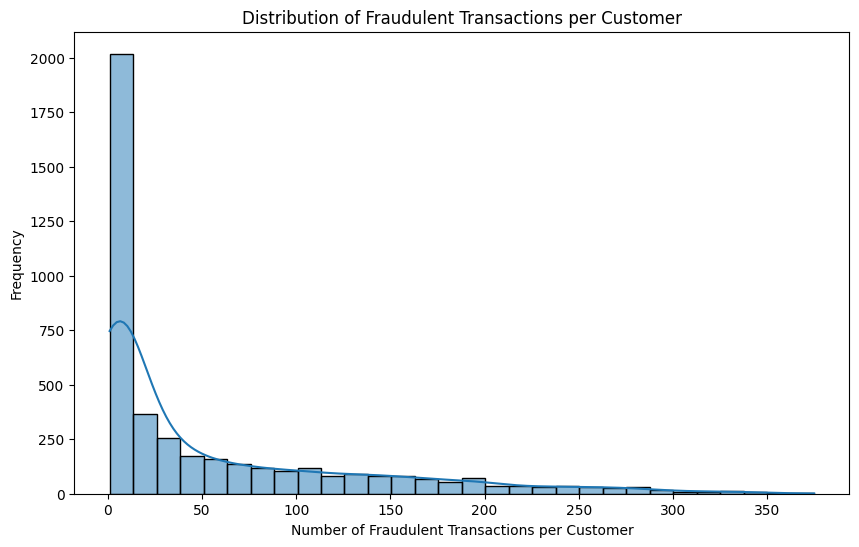

In [18]:
# Count the number of fraudulent transactions per customer
fraud_customers = data[data['TX_FRAUD'] == 1]['CUSTOMER_ID'].value_counts()

# Plot the distribution of the number of fraudulent transactions per customer
plt.figure(figsize=(10, 6))
sns.histplot(fraud_customers, bins=30, kde=True)
plt.title('Distribution of Fraudulent Transactions per Customer')
plt.xlabel('Number of Fraudulent Transactions per Customer')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Define features and target
X = data.drop(columns=['TX_FRAUD'])
y = data['TX_FRAUD']

# Standardize continuous features
scaler = StandardScaler()
X[['TX_AMOUNT', 'TX_TIME_SECONDS']] = scaler.fit_transform(X[['TX_AMOUNT', 'TX_TIME_SECONDS']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Machine Learning Models

## Random Forest Classifier

In [20]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455062
           1       1.00      1.00      1.00     71185

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



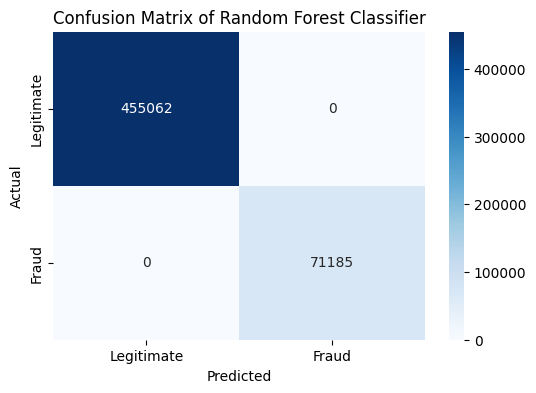

In [21]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree Classifier

In [22]:
# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455062
           1       1.00      1.00      1.00     71185

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



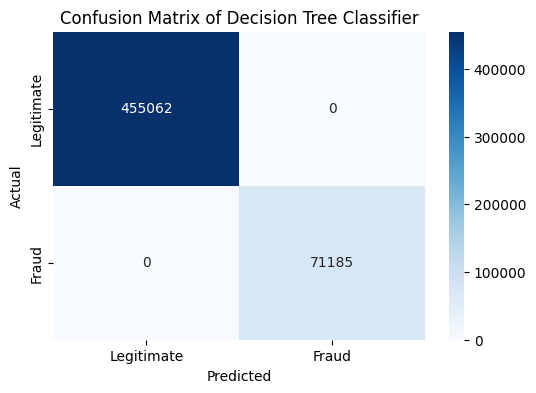

In [23]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [24]:
# Train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.9469241629881026
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    455062
           1       0.90      0.68      0.78     71185

    accuracy                           0.95    526247
   macro avg       0.93      0.84      0.87    526247
weighted avg       0.95      0.95      0.94    526247



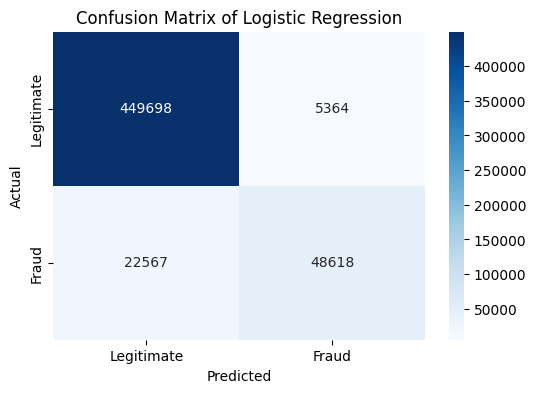

In [25]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine (SVM)

In [28]:
import xgboost as xgb

In [29]:
# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Train the model
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the model
print("XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:59:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455062
           1       1.00      1.00      1.00     71185

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



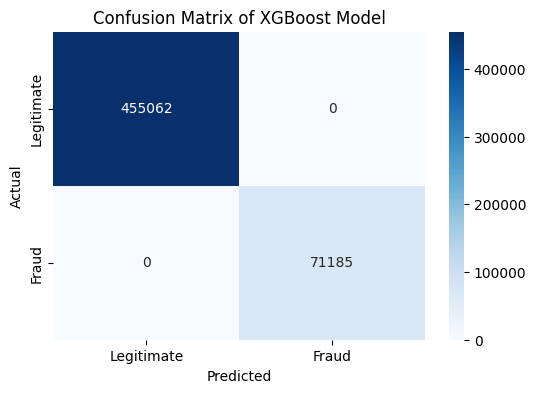

In [30]:
# Confusion Matrix
cm_xg = confusion_matrix(y_test, y_pred_xgb)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix of XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Comparison

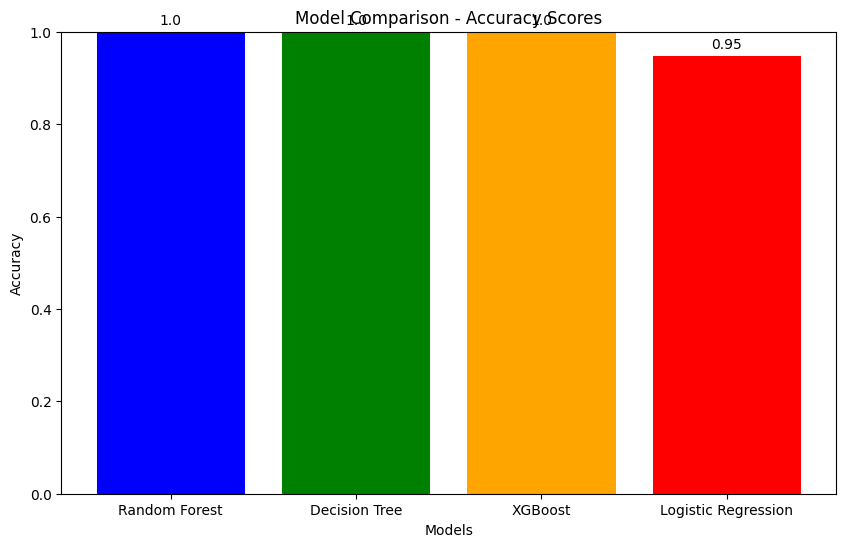

In [31]:
# Model names and their accuracy scores
models = ['Random Forest', 'Decision Tree', 'XGBoost', 'Logistic Regression']
accuracy_scores = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_lr)
]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])

# Add score labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Add titles and labels
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Show the plot
plt.show()